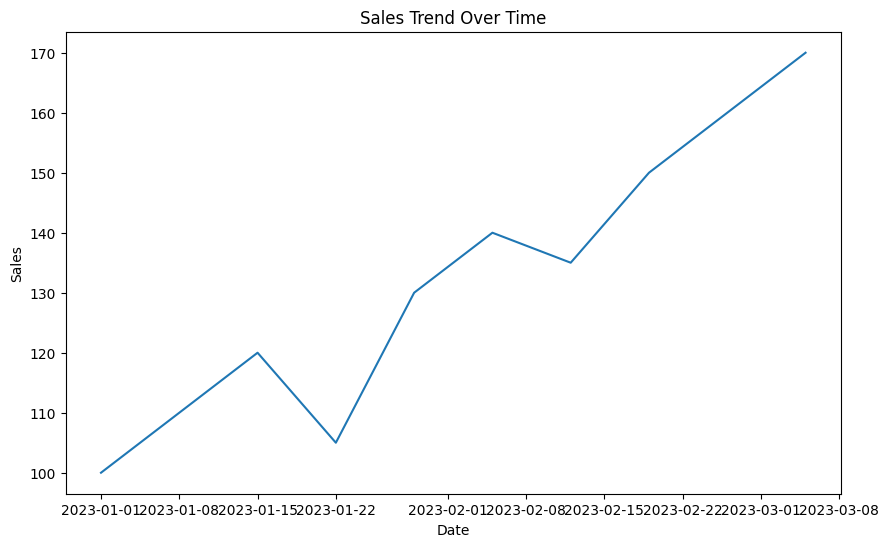

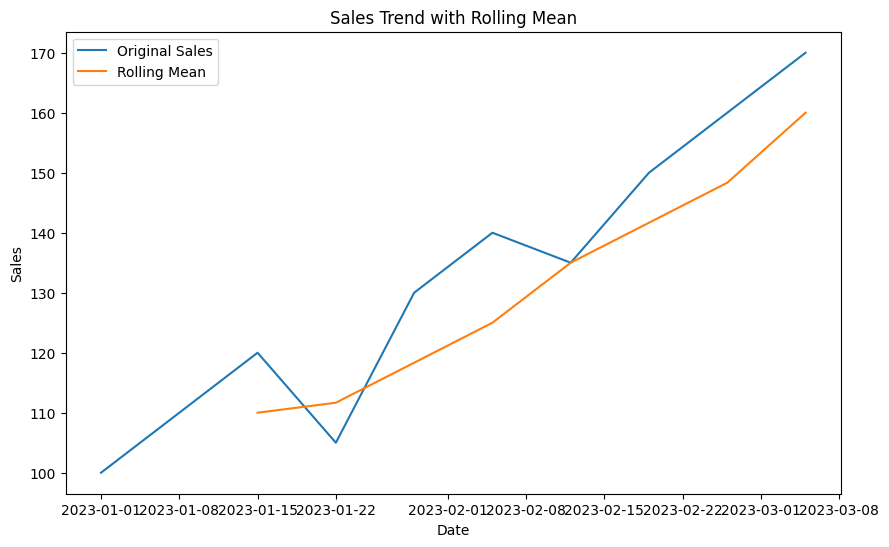

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 12.692278782555512
            Forecasted Sales
Date                        
2023-03-12        167.905049
2023-03-19        172.240826
2023-03-26        173.585139
2023-04-02        205.282695
2023-04-09        199.472355


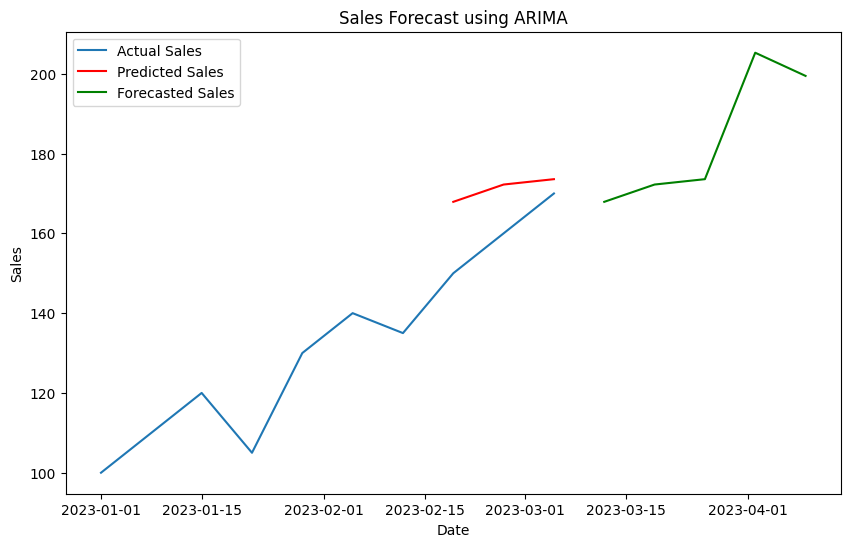

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Dataset Selection (Replace with your actual data)
# Sample Data
data = {'Date': pd.to_datetime(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22', '2023-01-29',
                               '2023-02-05', '2023-02-12', '2023-02-19', '2023-02-26', '2023-03-05']),
        'Sales': [100, 110, 120, 105, 130, 140, 135, 150, 160, 170]}
df = pd.DataFrame(data)
df = df.set_index('Date')


# 2. Visualize Sales Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Calculate and plot rolling mean
rolling_mean = df['Sales'].rolling(window=3).mean() # 3-period rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Original Sales')
plt.plot(rolling_mean, label='Rolling Mean')
plt.title('Sales Trend with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 3. Use ARIMA for Forecasting
# Split data into training and testing sets
train_data = df[:-3]
test_data = df[-3:]


# Fit the ARIMA model (p,d,q) - experiment with these parameters.
# (5,1,0) is an example, find optimal parameters through model selection.
model = ARIMA(train_data['Sales'], order=(5,1,0))
model_fit = model.fit()


# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse}")

# Forecast future sales
forecast_steps = 5  # Number of future periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)


# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Date': pd.date_range(start=df.index[-1] + pd.Timedelta(days=7), periods=forecast_steps, freq='W'),
                           'Forecasted Sales': forecast}) # Assuming weekly data, adjust 'freq' as needed
forecast_df = forecast_df.set_index('Date')
print(forecast_df)

# Plot forecast against actual sales
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Actual Sales')
plt.plot(predictions, label='Predicted Sales', color='red')  # Plotting predictions for the test data
plt.plot(forecast_df['Forecasted Sales'], label='Forecasted Sales', color='green')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
